In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary', 'number_project','time_spend_company'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'],
    class_var = 'left'
)

In [6]:
exp = Experiment('data/HR_comma_sep.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.001,
                 batch_size=1024,
                 weight_decay=0.001,
                 n_epoch=70,
                 verbose=True,
                 n_bins_range=[10,15],#range(15, 16),
                 n_init_bins_list=[15])

In [7]:
print('#Numerical Vars =', len(var_dict['numerical_vars']))
print('#Categorical Vars =', len(var_dict['categorical_vars']))
print('#Dummy coded categorical cols =', exp.n_dummy_coded_categorical_cols)

#Numerical Vars = 3
#Categorical Vars = 6
#Dummy coded categorical cols = 17


In [8]:
%time clustering_scores = exp.test_clustering_performance()

>>> Epoch = 1, Loss = 0.6210866570472717
>>> Epoch = 2, Loss = 0.531308650970459
>>> Epoch = 3, Loss = 0.44523876905441284
>>> Epoch = 4, Loss = 0.3948915898799896
>>> Epoch = 5, Loss = 0.35692521929740906
>>> Epoch = 6, Loss = 0.33903947472572327
>>> Epoch = 7, Loss = 0.328747034072876
>>> Epoch = 8, Loss = 0.3201671540737152
>>> Epoch = 9, Loss = 0.3128328025341034
>>> Epoch = 10, Loss = 0.31129875779151917
>>> Epoch = 11, Loss = 0.3081109821796417
>>> Epoch = 12, Loss = 0.30694714188575745
>>> Epoch = 13, Loss = 0.3068550229072571
>>> Epoch = 14, Loss = 0.3034784495830536
>>> Epoch = 15, Loss = 0.30462607741355896
>>> Epoch = 16, Loss = 0.3036530315876007
>>> Epoch = 17, Loss = 0.3035852909088135
>>> Epoch = 18, Loss = 0.3031754791736603
>>> Epoch = 19, Loss = 0.30151376128196716
>>> Epoch = 20, Loss = 0.3012462854385376
>>> Epoch = 21, Loss = 0.3008253276348114
>>> Epoch = 22, Loss = 0.3015274107456207
>>> Epoch = 23, Loss = 0.30154839158058167
>>> Epoch = 24, Loss = 0.300581306219

In [9]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 34, NMI = 0.0019
agglomerative, #Cols = 34, NMI = 0.0115


In [10]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 34, NMI = 0.0005
agglomerative, #Cols = 34, NMI = 0.2184


In [11]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 10, #Cols = 61, #NMI = 0.0148
#Bins = 15, #Cols = 76, #NMI = 0.0148
agglomerative
#Bins = 10, #Cols = 61, #NMI = 0.3031
#Bins = 15, #Cols = 76, #NMI = 0.1321


In [12]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 10, #Cols = 61, #NMI = 0.0148
#Bins = 15, #Cols = 76, #NMI = 0.0148
agglomerative
#Bins = 10, #Cols = 61, #NMI = 0.2868
#Bins = 15, #Cols = 76, #NMI = 0.1293


In [13]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 15, #Cols = 50, NMI = 0.0148
agglomerative
#Init Bins = 15, #Cols = 50, NMI = 0.2822


In [14]:
exp.semantic_binning.bins_by_var

{'average_montly_hours': {'bins': ['(95.999, 150.0]',
   '(150.0, 168.0]',
   '(168.0, 243.0]',
   '(243.0, 272.0]',
   '(272.0, 310.0]'],
  'split_point': [95.999, 150.0, 168.0, 243.0, 272.0, 310.0]},
 'last_evaluation': {'bins': ['(0.359, 0.51]',
   '(0.51, 0.54]',
   '(0.54, 0.57]',
   '(0.57, 0.61]',
   '(0.61, 0.65]',
   '(0.65, 0.74]',
   '(0.74, 1.0]'],
  'split_point': [0.359, 0.51, 0.54, 0.57, 0.61, 0.65, 0.74, 1.0]},
 'satisfaction_level': {'bins': ['(0.089, 0.14]',
   '(0.14, 0.45]',
   '(0.45, 0.57]',
   '(0.57, 0.62]',
   '(0.62, 0.67]',
   '(0.67, 0.95]',
   '(0.95, 1.0]'],
  'split_point': [0.089, 0.14, 0.45, 0.57, 0.62, 0.67, 0.95, 1.0]}}

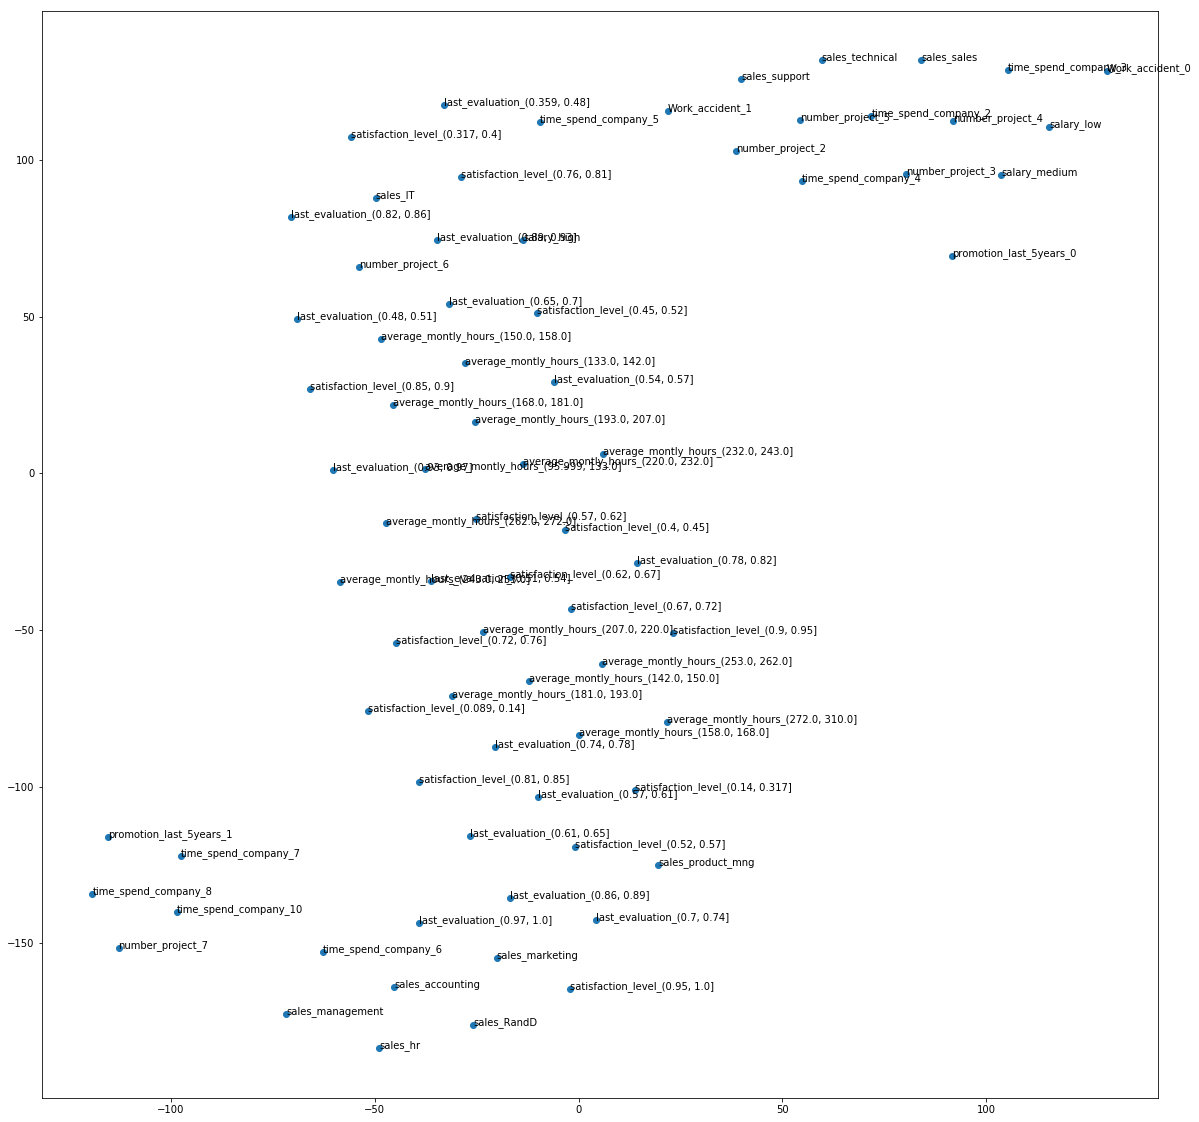

In [15]:
exp.semantic_binning.visualize_bin_embeddings()

### (1) 다른 데이터셋?

### (3) 정성 평가?

### (2) 수렴하면 중도에 멈추도록 하고 싶은데, 체크할 방법?